<a href="https://colab.research.google.com/github/mkounkel/Auriga/blob/master/Lab_1_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: History

In [1]:
!pip install PyAstronomy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.3/779.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.1 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.22.0-py3-none-any.whl size=557910 sha256=f80fa2fceab06b755e1e2d12946bb901891b3a72de7011d2827465cec57b7c98
  Stored in directory: /root/.cache/pip/wheels/a3/53/20/11d5947fd6a452201469232799c57238f2359a090cbd90d2f0
Successfully built PyAstronomy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl

Today we will look at retrograde motion of Mars, when it occurs, how often, and under what conditions. To do this, we will first initiate a Keplerian orbit for both Earth and Mars with their appropriate orbital parameters (orbital period of Earth is 1 year, orbital period of Mars is 1.88 years), and integrate the orbit once a day over a period of 3 years. Variables eX, eY, eZ, as well as mX, mY, and mZ represent XYZ position of Earth and Mars respectively, both of which are relative to the Sun.

In [186]:
earth=pyasl.KeplerEllipse(1, 1, e=0.016, Omega=-11.2, i=1.6, w=114.2)
mars=pyasl.KeplerEllipse(1.523, 1.880, e=0.0934, Omega=49.578, i=1.850, w=286.5)
t = np.arange(0, 365.25*3, 1)

earthXYZ = earth.xyzPos(t/365)
marsXYZ = mars.xyzPos(t/365.25)

eX,eY,eZ=earthXYZ[:,0],earthXYZ[:,1],earthXYZ[:,2]
mX,mY,mZ=marsXYZ[:,0],marsXYZ[:,1],marsXYZ[:,2]

Plot X vs Y positions of both planets.

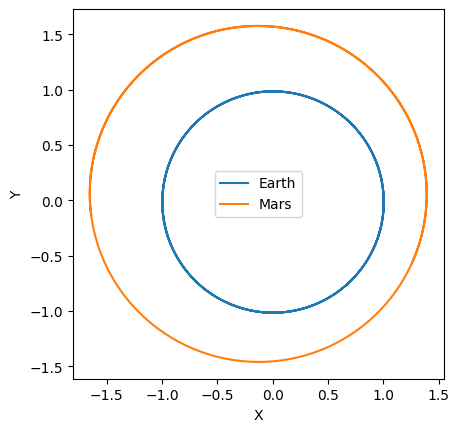

In [187]:
plt.plot(eX,eY,label='Earth')
plt.plot(mX,mY,label='Mars')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

Using these XYZ variables, let's define a few variables that would make us easier to keep track of these planets in different reference frames.

First, distance between Earth and Mars can be defined as
$$d=\sqrt{\Delta X^2 +\Delta Y^2 + \Delta Z^2}$$

Ecliptic latitude of Mars in Earth's sky can be defined as
$$b=\arcsin{\frac{\Delta Z}{d}}$$
Ecliptic longitude of Mars in Earth's sky can be defined as
$$l=\rm{arctan2}(\Delta Y, \Delta Z)$$
(Unlike regular arctan, which is defined from -90 to 90 deg, arctan2 is a function in numpy library which is defined from -180 to 180 deg)

Finally, we will also calculate the angular position of both Earth and Mars relative to the sun, using expression slimilar to the calculation of lognitude to the above, just with, e.g., $X$ instead of $\Delta X$.

Remember that all angles are returned in radians, and it may be advantageous to convert them to degrees.

In [188]:
d = np.sqrt((mX-eX)**2 + (mY-eY)**2 + (mZ-eZ)**2)
b = np.arcsin((mZ-eZ) / d)*180/np.pi
l = np.arctan2((mY-eY), (mX-eX))*180/np.pi

le = np.arctan2(eY, eX)*180/np.pi
lm = np.arctan2(mY, mX)*180/np.pi

Use np.where and np.diff functions to find where difference in $l$ between consequtive days is negative. I.e, when Mars is moving in retrograde. (It may also be useful to filter for very large jumps, since the transition from $360^\circ$ to $0^\circ$ would also lead to numerically negative change)

Make a scatter plot of the position of Mars in Earth's sky (i.e., $l$ vs $b$). Indicate the points where Mars is moving in retrograde in different color.

(Remember that $l$ is increasing from right to left)

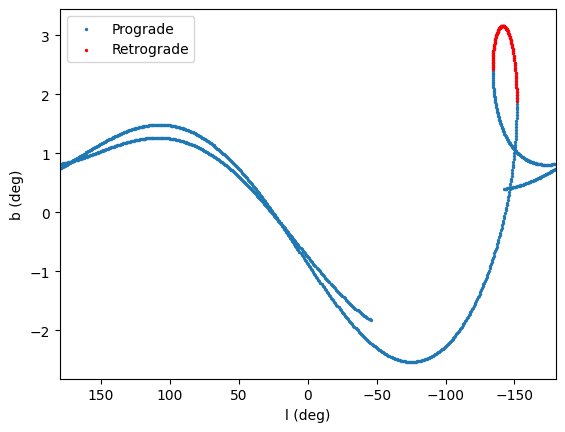

76.0


In [189]:
plt.scatter(l,b,s=2,label='Prograde')

a=np.where((np.diff(l)<0) & (np.diff(l)>-300))[0]
plt.scatter(l[a],b[a],c='red',s=2,label='Retrograde')
plt.xlim(180,-180)
plt.xlabel('l (deg)')
plt.ylabel('b (deg)')
plt.legend()
plt.show()

print(np.max(t[a])-np.min(t[a]))

#### Question:
- How long does it take for Mars to move in retrograde?
- $b=0^\circ$ indicates a line of ecliptic. How far above or below ecliptic can Mars be found?
- How wide of a "hook" in ecliptic longitude does Mars make while moving in retrograde?
#### Answer:


----
Repeat the plot of X vs Y, but also color-code the segment over which Mars is moving in retrograde.

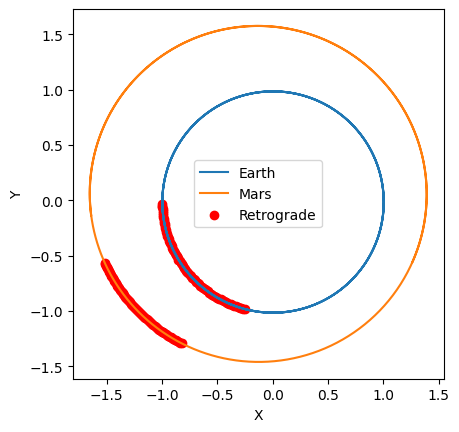

In [171]:
plt.plot(eX,eY,label='Earth')
plt.plot(mX,mY,label='Mars')
plt.scatter(eX[a],eY[a],c='red',label='Retrograde')
plt.scatter(mX[a],mY[a],c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

#### Question
The arc over which the Earth moves during this time is longer than the arc over which the Mars moves, while Mars appears to be in retrograde. Why?
#### Answer

----
Make a plot of distance between Earth and Mars as a function of time

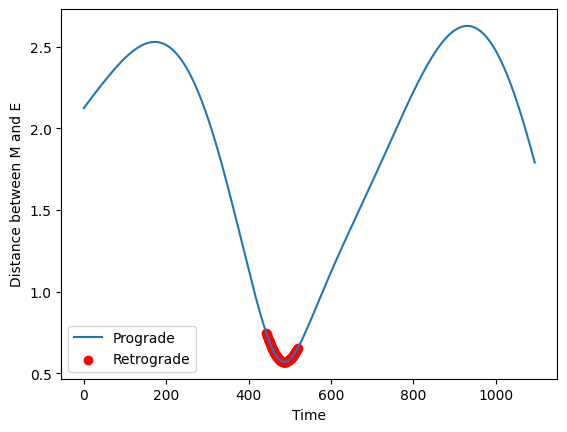

In [172]:
plt.plot(t,d,label='Prograde')
plt.scatter(t[a],d[a],c='red',label='Retrograde')
plt.xlabel('Time')
plt.ylabel('Distance between M and E')
plt.legend()
plt.show()

#### Question
How close does Mars get to the Earth while it is moving in retrograde?
#### Answer

----
Make a plot of difference between the angular position of Mars and Earth relative to the Sun, as a function of time.

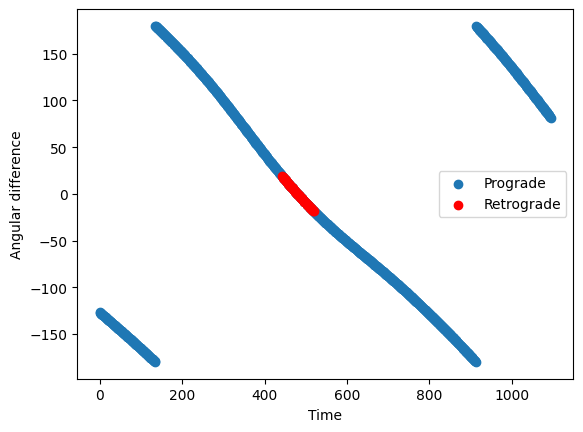

In [178]:
x=lm-le

z=np.where(lm-le>180)[0]
x[z]=x[z]-360
z=np.where(lm-le<-180)[0]
x[z]=x[z]+360

plt.scatter(t,x,label='Prograde')




plt.scatter(t[a],x[a],label='Retrograde',c='red')
#plt.ylim(-50,50)
plt.xlabel('Time')
plt.ylabel('Angular difference')
plt.legend()
plt.show()

#### Question
Over what range of angular separations does Mars move in retrograde?
#### Answer

----
#### Reflection Questions

- How long did this lab take you?
- What were the areas that were easy?
- What were the areas that presented a challenge?

#### Answers

----
## Extra credit

Repeat the above plots, but using Venus instead of Mars

In [190]:
venus=pyasl.KeplerEllipse(0.723, 0.615, e=0.016, Omega=76.680, i=2.15, w=54.884)
#put your code here

#### Question
What are the similarities and differences between the retrograde motion of the superior (i.e., outer) and the inferior (i.e., inner) planets?
#### Answer

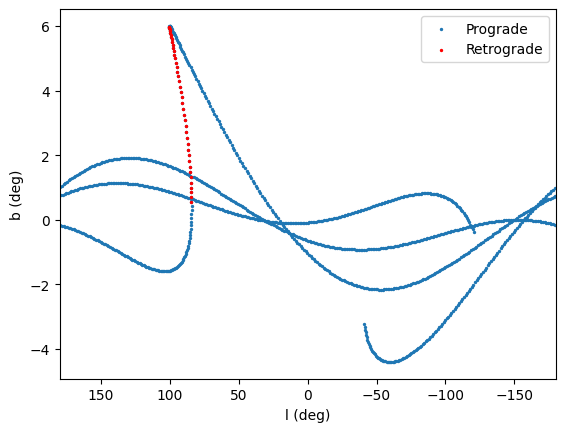

42.0


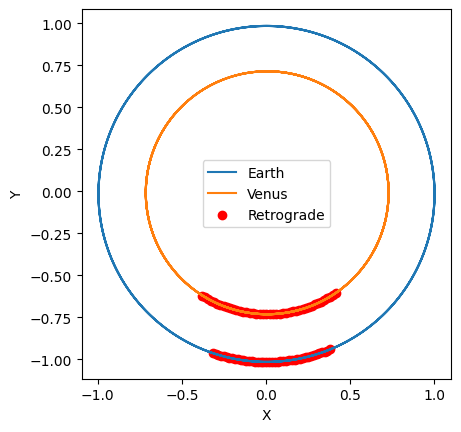

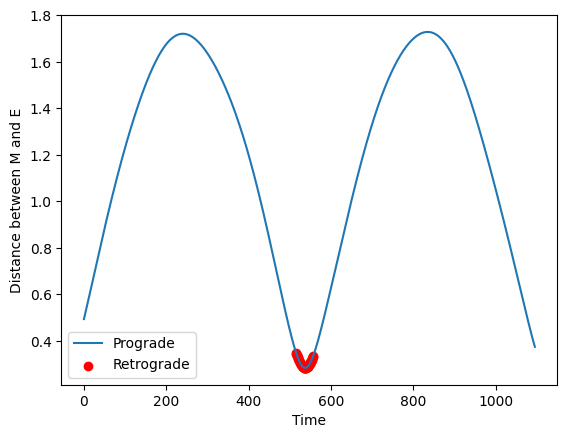

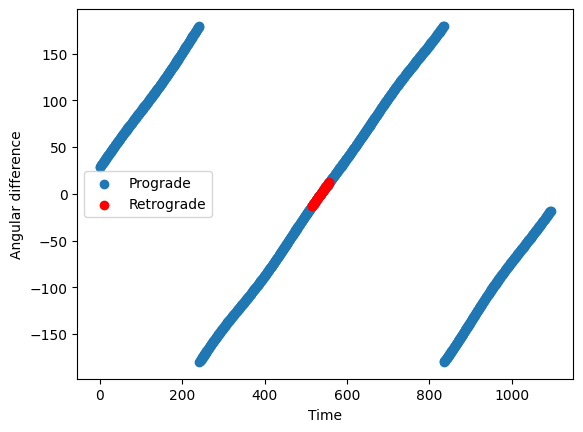

In [195]:
t = np.arange(0, 365.25*3, 1)
earthXYZ = earth.xyzPos(t/365)
marsXYZ = venus.xyzPos(t/365.25)

eX,eY,eZ=earthXYZ[:,0],earthXYZ[:,1],earthXYZ[:,2]
mX,mY,mZ=marsXYZ[:,0],marsXYZ[:,1],marsXYZ[:,2]
d = np.sqrt((mX-eX)**2 + (mY-eY)**2 + (mZ-eZ)**2)
b = np.arcsin((mZ-eZ) / d)*180/np.pi
l = np.arctan2((mY-eY), (mX-eX))*180/np.pi

le = np.arctan2(eY, eX)*180/np.pi
lm = np.arctan2(mY, mX)*180/np.pi

plt.scatter(l,b,s=2,label='Prograde')

a=np.where((np.diff(l)<0) & (np.diff(l)>-300))[0]
plt.scatter(l[a],b[a],c='red',s=2,label='Retrograde')
plt.xlim(180,-180)
plt.xlabel('l (deg)')
plt.ylabel('b (deg)')
plt.legend()
plt.show()

print(np.max(t[a])-np.min(t[a]))

plt.plot(eX,eY,label='Earth')
plt.plot(mX,mY,label='Venus')
plt.scatter(eX[a],eY[a],c='red',label='Retrograde')
plt.scatter(mX[a],mY[a],c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

plt.plot(t,d,label='Prograde')
plt.scatter(t[a],d[a],c='red',label='Retrograde')
plt.xlabel('Time')
plt.ylabel('Distance between M and E')
plt.legend()
plt.show()

x=lm-le

z=np.where(lm-le>180)[0]
x[z]=x[z]-360
z=np.where(lm-le<-180)[0]
x[z]=x[z]+360

plt.scatter(t,x,label='Prograde')




plt.scatter(t[a],x[a],label='Retrograde',c='red')
#plt.ylim(-50,50)
plt.xlabel('Time')
plt.ylabel('Angular difference')
plt.legend()
plt.show()